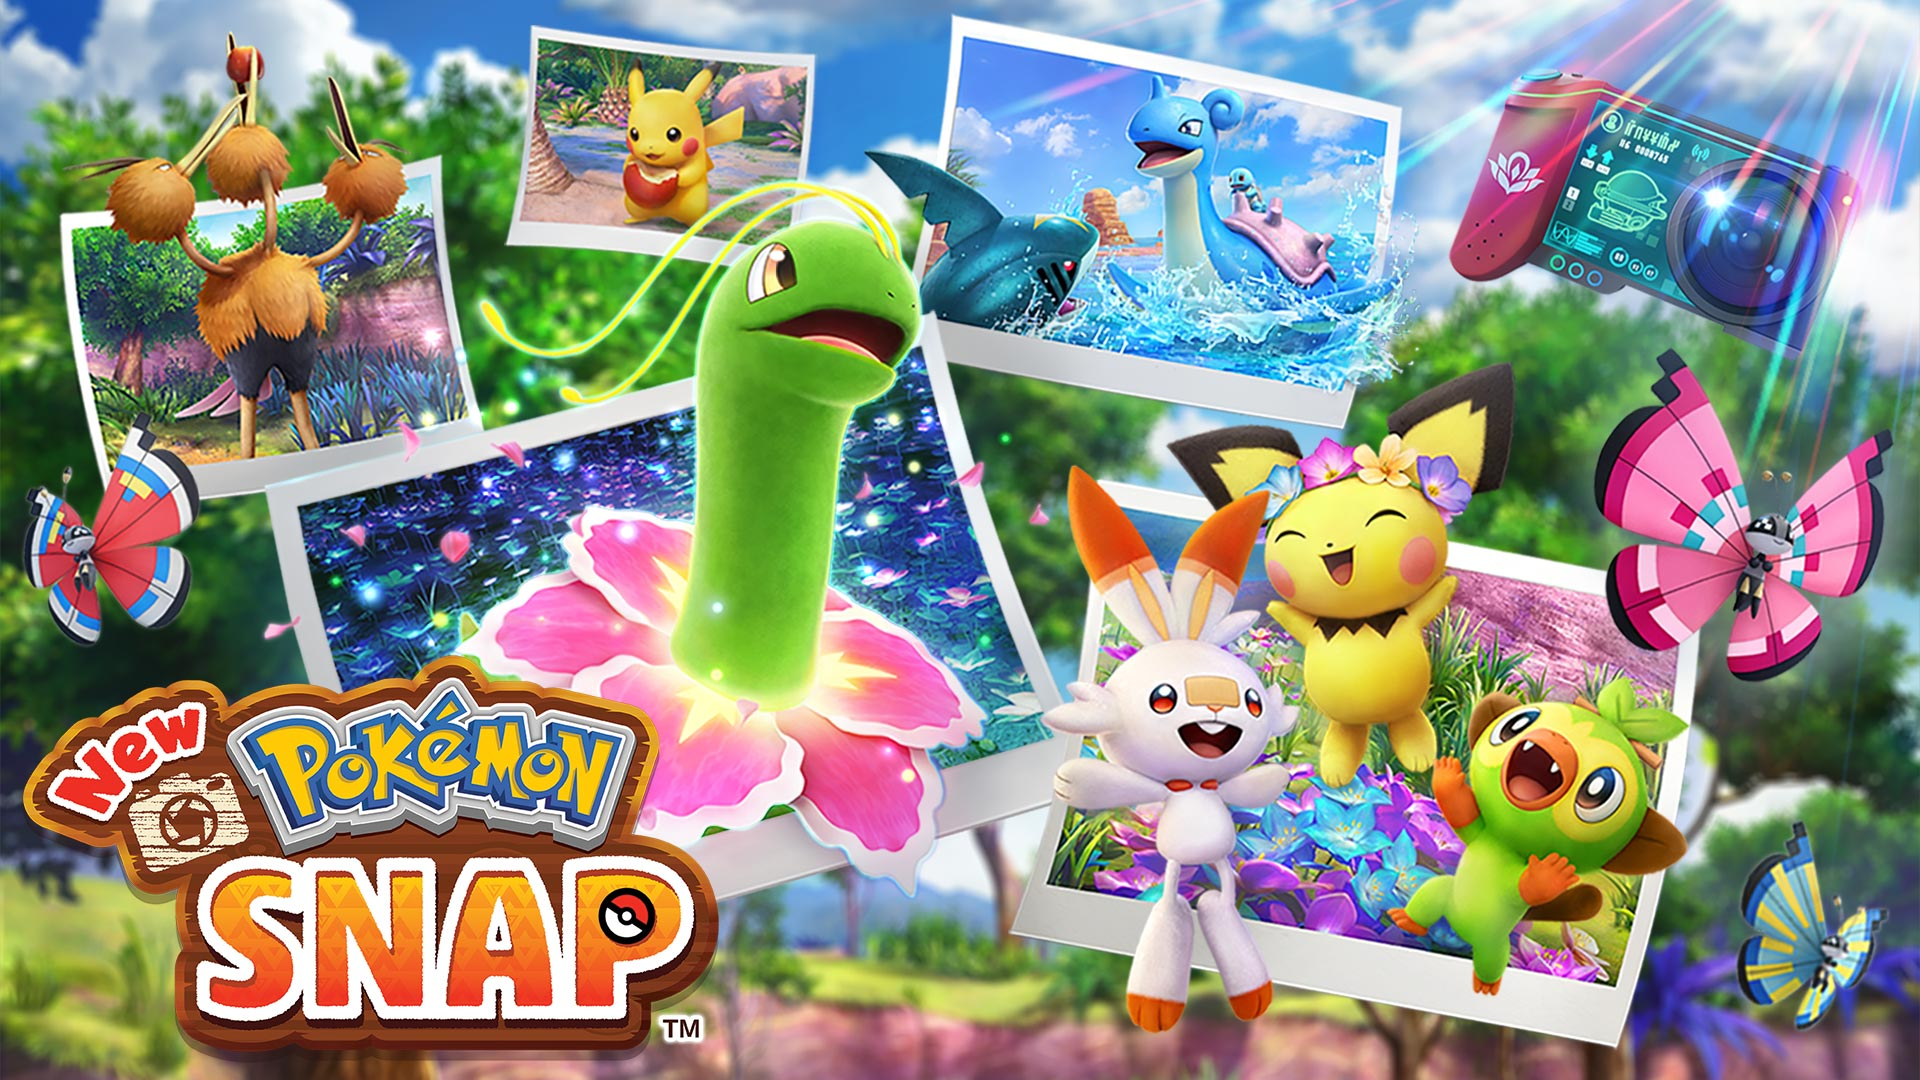

# Data Analysis and Visualization with Seaborn and Pokemon

### Some plotting code sourced from https://elitedatascience.com/python-seaborn-tutorial#step-9. All questions created by me!

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [5]:
df = pd.read_csv('./data/Pokemon.csv', index_col=0, encoding= 'unicode_escape')

In [6]:
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False

### 1. Use the info command in Pandas to get basic information about the DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


### 2. How many missing values are in each column?

In [8]:
df.isna().sum()

Name          0
Type 1        0
Type 2       84
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Stage         0
Legendary     0
dtype: int64

### 3. Programmatically determine which Pokemon has the largest absolute difference between their attack and defense. You can see a plot of defense vs. attack below.

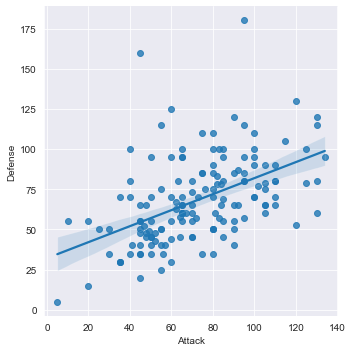

In [9]:
sns.lmplot(x='Attack', y='Defense', data=df)

In [10]:
df['AttkDefDiff'] = abs((df['Attack'] - df['Defense']))
df.sort_values('AttkDefDiff', ascending = False).head(1)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                              
95  Onix   Rock  Ground    385  35      45      160       30       45     70   

    Stage  Legendary  AttkDefDiff  
#                                  
95      1      False          115

### 4. Create a scatter plot with trend line like the one below, but this time plot only the stage 1 data points.

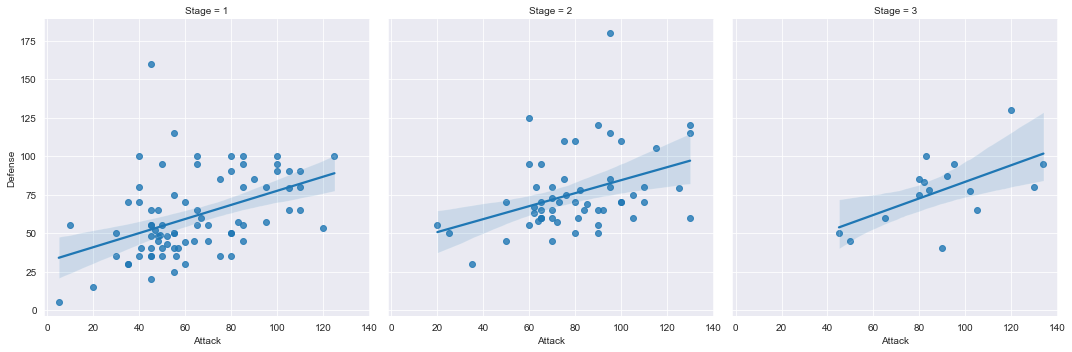

In [11]:
sns.lmplot(x="Attack", y="Defense", col="Stage",data=df)

In [12]:
df.filtered = df[df['Stage'] == 1]
sns.lmplot(x="Attack", y = "Defense", data = df.filtered)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


### 5. Create a plot similar to the sample plot for #4, but plot Stage as the rows and Legendary as the columns of the multiplot. Use the "coolwarm" color palette. There should be six subplots in the result (some may be blank). The example below may help you get started.

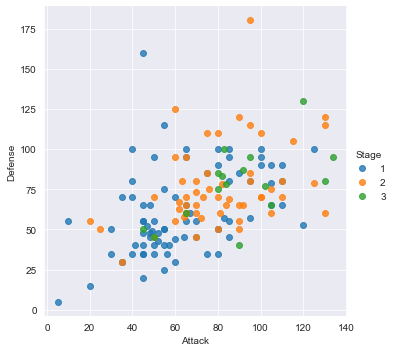

In [13]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

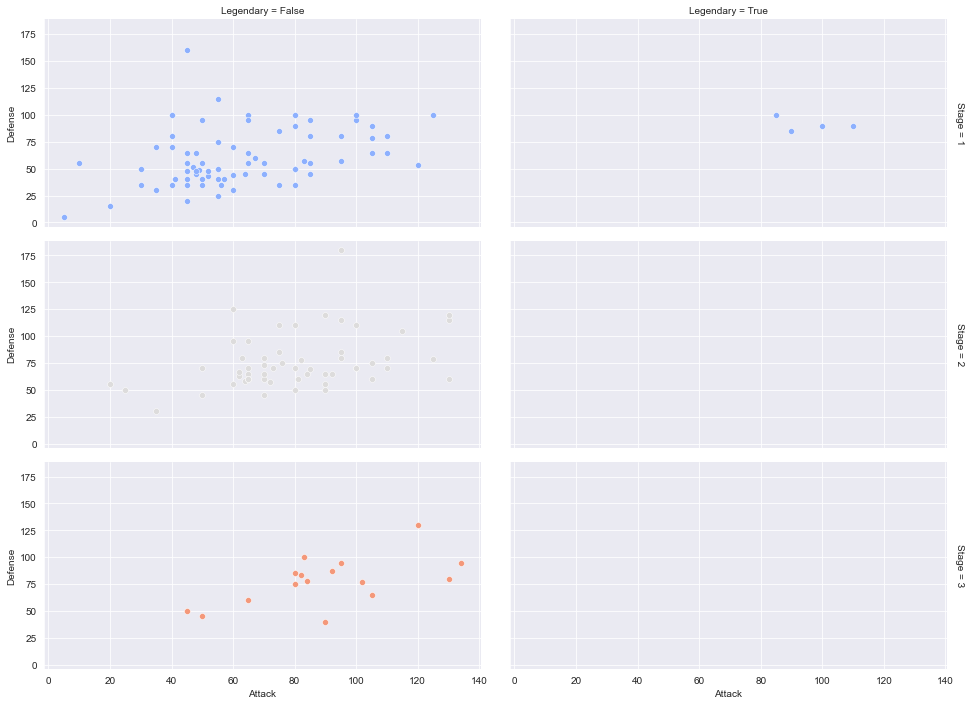

In [14]:
g = sns.FacetGrid(df, row='Stage', col='Legendary', hue='Stage', palette='coolwarm', margin_titles=True)
g.map(sns.scatterplot, 'Attack', 'Defense')
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### 6. Create another scatterplot like the sample in #5, but color the points by whether or not the Pokemon is legendary instead of Stage.

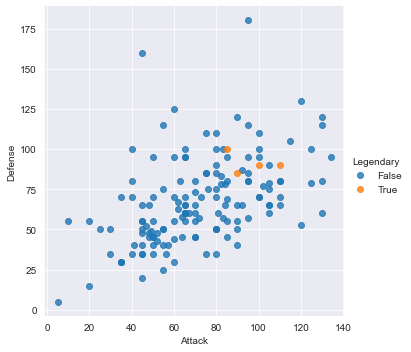

In [15]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Legendary')   # Color by evolution stage

### 7. We want to focus on the crowded portion of the graph. Change the plot you just made in #6 so that the domain of the graph is from 40 to 100 and the range is from 25 to 100.

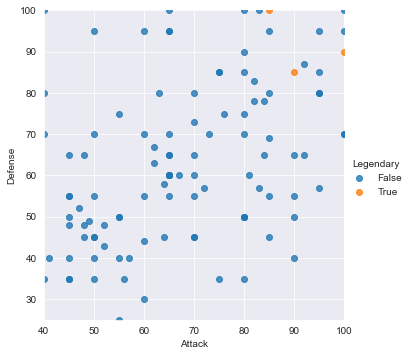

In [16]:
# Scatterplot arguments
g = sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Legendary')   
g.set(ylim=(25, 100))
g.set(xlim=(40,100))

### 8. Create a box plot with Legendary on the x-axis and HP on the y-axis. This link may help, as will the examples below: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:>

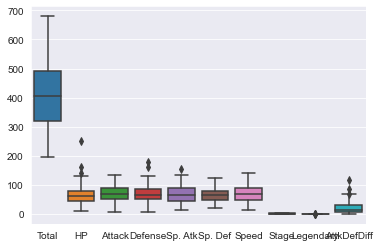

In [17]:
# Boxplot
sns.boxplot(data=df)

<AxesSubplot:>

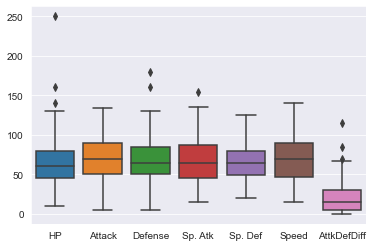

In [18]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Legendary', ylabel='HP'>

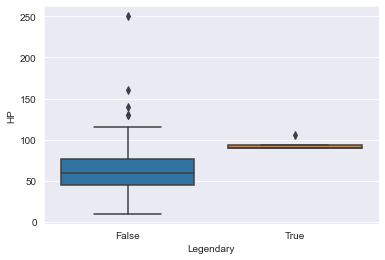

In [19]:
sns.boxplot(data=df, x="Legendary", y="HP")

### 9. How substantial is the difference in HP between the Legendary and not Legendary groups? Find the mean, median, etc. of each using the Pandas "describe" function.

In [20]:
print(df[(df['Legendary'] == True)].describe())
print(df[(df['Legendary'] == False)].describe())
df[(df['Legendary'] == True)].describe() - df[(df['Legendary'] == False)].describe() 
# The average difference HP between Legendary and not Legendary Pokemon are about 30.6 HP. 

       Total     HP      Attack     Defense     Sp. Atk     Sp. Def  \
count    4.0    4.0    4.000000    4.000000    4.000000    4.000000   
mean   605.0   94.0   96.250000   91.250000  124.750000   97.500000   
std     50.0    8.0   11.086779    6.291529   24.088379   18.484228   
min    580.0   90.0   85.000000   85.000000   95.000000   85.000000   
25%    580.0   90.0   88.750000   88.750000  117.500000   88.750000   
50%    580.0   90.0   95.000000   90.000000  125.000000   90.000000   
75%    605.0   94.0  102.500000   92.500000  132.250000   98.750000   
max    680.0  106.0  110.000000  100.000000  154.000000  125.000000   

            Speed  Stage  AttkDefDiff  
count    4.000000    4.0     4.000000  
mean   101.250000    1.0    12.500000  
std     20.155644    0.0     6.454972  
min     85.000000    1.0     5.000000  
25%     88.750000    1.0     8.750000  
50%     95.000000    1.0    12.500000  
75%    107.500000    1.0    16.250000  
max    130.000000    1.0    20.000000  


Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count -143.000000 -143.000000 -143.000000 -143.000000 -143.000000 -143.000000   
mean   203.306122   30.598639   24.345238   23.651361   59.178571   32.336735   
std    -45.224005  -20.521960  -15.529040  -20.701535   -2.951926   -5.320642   
min    385.000000   80.000000   80.000000   80.000000   80.000000   65.000000   
25%    260.000000   45.000000   38.750000   38.750000   72.500000   42.250000   
50%    175.000000   30.000000   25.000000   25.000000   65.000000   25.000000   
75%    115.000000   17.500000   12.500000   12.500000   47.250000   18.750000   
max     80.000000 -144.000000  -24.000000  -80.000000   19.000000    5.000000   

            Speed       Stage  AttkDefDiff  
count -143.000000 -143.000000  -143.000000  
mean    33.195578   -0.598639    -7.846939  
std     -6.249986   -0.679039   -12.113543  
min     70.000000    0.000000     5.000000  
25%     43.750000    0.000000     3.750000  
50%     28.000000    0.000000    -2.500000  
75%     17.500000   -1.000000   -13.750000  
max    -10.000000   -2.000000   -95.000000

### 10. Where did the creator get the color codes below? In other words, did they make them up or is there some methodology to how they're specified? Is #78G23A a valid color?

In [21]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

The color codes are hex color codes. The colors can be found from hex color code selectors with the exact code being able to be found. #78G23A is not a valid hex color code. 

### 11. Which of the three plots immediately below do you think conveys the information best? Why?

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

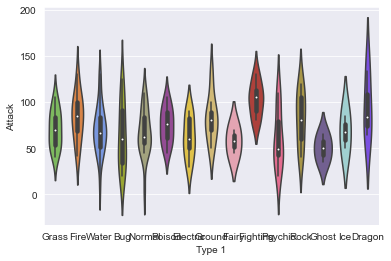

In [22]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


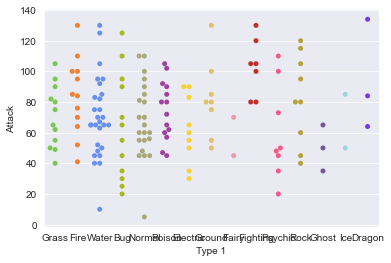

In [23]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

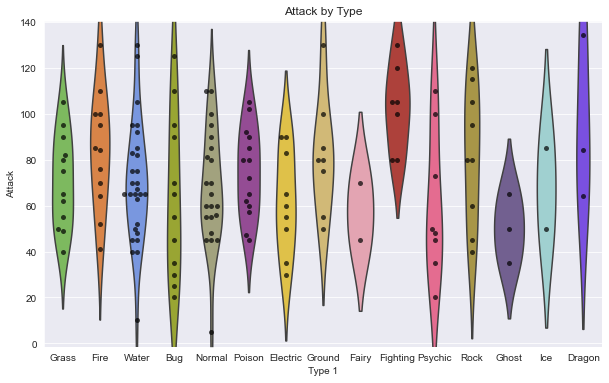

In [24]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

The third graph is the best representation of the data. A violin graph can accurately represent where the most prominent datapoints fall for the specific type of pokemon. The colors are representative of the type based on their hex color code and the graph is not cluttered like the first graph. 

### 12. Remove the Type 1 and Type 2 columns from the stats_df DataFrame and call this new DataFrame "new_stats_df". Now melt the data so that it includes the Name column and melts the statistics (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) into separate rows. Call this DataFrame "new_melted_df" and print out the first five rows.

In [25]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                            
1   Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2     Ivysaur  Grass  Poison  60      62       63       80       80     60   
3    Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Charmander   Fire     NaN  39      52       43       60       50     65   
5  Charmeleon   Fire     NaN  58      64       58       80       65     80   

   AttkDefDiff  
#               
1            0  
2            1  
3            1  
4            9  
5            6

In [26]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

In [35]:
new_stats_df = stats_df.drop(columns=['Type 1', 'Type 2'])
new_melted_df = pd.melt(new_stats_df, 
                    id_vars=['Name'], # Variables to keep
                    var_name="Stat") # Name of melted variable
new_melted_df.head()

Name Stat  value
0   Bulbasaur   HP     45
1     Ivysaur   HP     60
2    Venusaur   HP     80
3  Charmander   HP     39
4  Charmeleon   HP     58

### 13. Create a swarmplot using melted_df with Type 1 on the x-axis, value on the y-axis, and colored by Stat. Improve the legend placement etc. as done in the example below.

C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData

<AxesSubplot:xlabel='Stat', ylabel='value'>

C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData

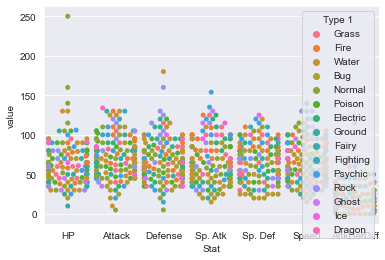

In [28]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

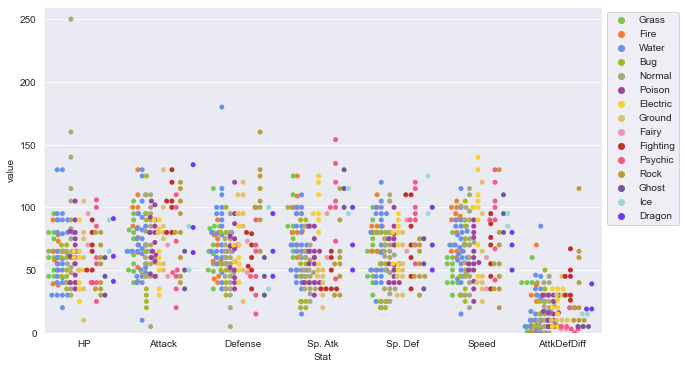

In [39]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The palette list has more values (15) than needed (7), which may not be intended.
  if __name__ == '__main__':
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jdorick\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


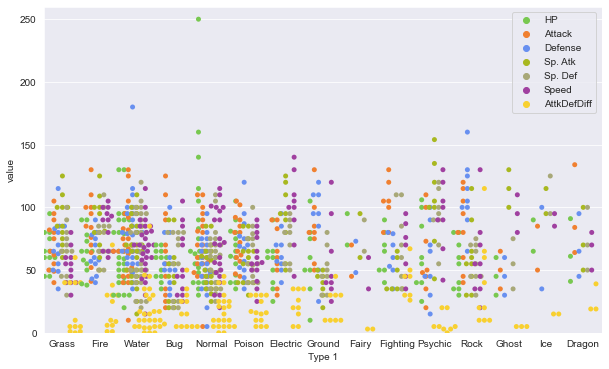

In [48]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Type 1', 
              y='value', 
              data=melted_df, 
              hue='Stat', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(.83, 1), loc=2)

### 14. Which plot in #13 conveys the information best? Why?

The second graph conveys the information best because it minimizes the number of columns, allowing for groupings of values to be more visible. 

### 15. Why do you think they removed Stage and Legendary from the heatmap below?

In [30]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

<AxesSubplot:>

There are only a few options for stage and legendary. Stage can either be 1, 2, or 3, and legendary is either true or false. These values would not be able to appear on the heatmap.

### 16. Create a kde plot comparing Attack on the x-axis and Total on the y-axis. The sample below will help.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

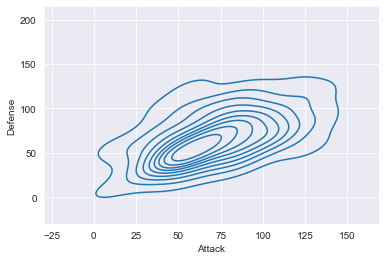

In [52]:
# Density Plot
sns.kdeplot(x = df.Attack, y = df.Defense)

In [55]:
sns.kdeplot(x = df.Attack, y = df.Total)

<AxesSubplot:xlabel='Attack', ylabel='Total'>

### 17. Interpret the kde plot just created.

There are two points with a high concentration values. The values with the highest concentration are around (50, 300) and (80, 500), falling off after those groupings.

### 18. Recreate the kde plot, but this time with a scatter plot overlaid on it. This link will help: https://seaborn.pydata.org/examples/layered_bivariate_plot.html

In [68]:
sns.scatterplot(x=df.Attack, y=df.Total, data=df)
sns.kdeplot(x = df.Attack, y = df.Total)

<AxesSubplot:xlabel='Attack', ylabel='Total'>

### 19. Create a joint plot relating Attack to Sp. Atk. Use a different color scheme than the one below. Include a regression line.

In [66]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

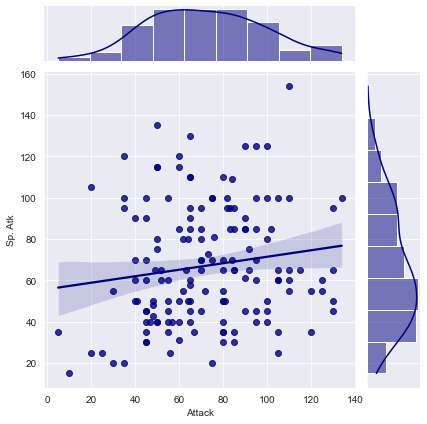

In [79]:
sns.jointplot(x='Attack', y='Sp. Atk', kind = 'reg', color ='navy', data=df)

Thank you for your time.